In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from pyecharts.charts import Bar, Line
from pyecharts import options as opts
from pyecharts.globals import ThemeType

import warnings
warnings.filterwarnings(action='ignore') 

In [40]:

dataset = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Data\최종데이터셋\finaldataset_ver7.6.1.csv')
#infoset = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Data\최종데이터셋\Finaldataset_ver7.3.csv')
#cset = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Data\최종데이터셋\Finaldataset_ver7.3.csv')
subset = pd.read_csv(r'C:\Users\JH\Desktop\상장폐지사유확인.csv',index_col=0,encoding='cp949')

In [12]:
len(dataset.loc[dataset['부도'] == 0]['회사명'].unique())

1993

In [13]:
len(dataset.loc[dataset['부도'] == 1]['회사명'].unique())

416

In [15]:
bar = (
    Bar()
    .add_xaxis(['코스닥 상장 기업'])
    .add_yaxis("정상 기업", [1993])
    .add_yaxis("부도 기업", [416])
    .set_global_opts(title_opts=opts.TitleOpts(title="기업 구분(정상/부도)"))
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=True),
        
                )
                )
bar.render_notebook()

In [62]:
bar = (
    Bar()
    .add_xaxis(['부도 사유'])
    .add_yaxis("감사 의견 부적정", [244])
    .add_yaxis("자본 잠식", [71])
    .add_yaxis("최종 부도 및 은행/당좌거래정지", [37])
    .set_global_opts(title_opts=opts.TitleOpts(title="코스닥 기업 주요 부도 사유"))
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=True),
        
                )
                )
bar.render_notebook()

In [45]:
cpname_bf = pd.Series(subset.loc[subset['부도'] == 0]['회사명'].unique())

In [53]:
cpname = pd.Series(dataset.loc[dataset['부도'] == 1]['회사명'].unique())
cpname

0      (주)경윤하이드로에너지
1          (주)골드카운티
2           (주)굿이엠지
3         (주)나노트로닉스
4          (주)나노하이텍
           ...     
411       한빛전자통신(주)
412         한솔신텍(주)
413        해원에스티(주)
414        현주컴퓨터(주)
415        후야인포넷(주)
Length: 416, dtype: object

In [52]:
subs =pd.DataFrame({'회사명':cpname, '존재여부': cpname.isin(cpname_bf)})
subs.loc[subs['존재여부'] == False]

,회사명,존재여부
8,(주)네프로아이티,False
135,(주)알에스넷,False
148,(주)에스브이에이치,False
159,(주)에이치앤아이,False
178,(주)엘피케이로보틱스,False
191,(주)웨스테이트디벨롭먼트,False
212,(주)이푸른,False
223,(주)제이에스피브이,False
248,(주)캐로스,False
294,(주)프리젠,False


# **부도, 정상 기업 분류**

In [3]:
bar = (
    Bar()
    .add_xaxis(['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'])
    .add_yaxis("유가증권시장", [14,14,9,10,8,10,3,1,4,1])
    .add_yaxis("코스닥", [47,25,15,18,11,8,14,7,12,26])
    .set_global_opts(title_opts=opts.TitleOpts(title="시장별 상장폐지 역사적 데이터", subtitle="출처: KIND 시장조치(상장폐지결정)"))
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=True),
        
                )
                )
bar.render_notebook()

# **연간 부도율**

In [160]:
dftarr = []
year = []
cpycnt = []
for i in dataset['년'].unique():
    dftarr.append(dataset.loc[dataset['년'] == i,'부도'].value_counts()[1])
    year.append(str(int(i)))
    cpycnt.append(round(dataset.loc[dataset['년'] == i,'부도'].value_counts()[1]/len(dataset.loc[dataset['년'] == i]['회사명'].unique()), 3))

In [16]:
# '2000','2001','2002','2003','2004','2005','2006','2007','2008','2009',
year = ['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020']
dftarr = [3, 10, 14, 29, 28, 7, 6, 18, 51, 55, 41, 33, 21, 17, 18, 6, 8, 16, 11, 5, 5]
#cpycnt = [942,1055,1148,1153,1179,1208,1258,1351,1341,1296,1273,1257,1258,1288,1321,1373,1406,1427,1433,1434,1431]

In [17]:
lines = (
    Line()
    .add_xaxis(year)
    .add_yaxis("유가증권시장", [777, 791, 874, 777, 773, 770, 779, 774, 788, 799, 800])
    .add_yaxis("코스닥시장", [1029,1031,1005,1009,1061,1152,1208,1266,1323,1405,1468])
    .set_global_opts(title_opts=opts.TitleOpts(title="상장 회사 수", subtitle="출처 : e나라지표"))
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=True),
        markpoint_opts=opts.MarkPointOpts(
        data=[opts.MarkPointItem(type_="max", name=""),
              opts.MarkPointItem(type_="min", name=""),]),
                )
                )
lines.render_notebook()

In [30]:
year = ['1Q19', '2Q19','3Q19','4Q19','1Q20','2Q20','3Q20','4Q20','1Q21','2Q21','3Q21(E)']
lines = (
    Line()
    .add_xaxis(year)
    .add_yaxis("국민은행", [0.05 ,-0.03 ,0.06, 0.08, 0.11, 0.12, 0.14, 0.14, 0.08, 0.11, 0.05])
    .add_yaxis("신한은행", [0.15 , 0.19 , 0.16, 0.14, 0.16, 0.29, 0.25, 0.24, 0.1, 0.08, 0.08])
    
    .set_global_opts(title_opts=opts.TitleOpts(title="대손비용률", subtitle="출처 : 신한, 국민은행 Factbook 및 경영공시"))
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=True),
        markpoint_opts=opts.MarkPointOpts(
        data=[opts.MarkPointItem(type_="max", name=""),
              opts.MarkPointItem(type_="min", name=""),]),
                )
                )
lines.render_notebook()

In [19]:
year = ['FY14','FY15','FY16','FY17','FY18','FY19','FY20','3Q21']
lines = (
    Line()
    .add_xaxis(year)
    .add_yaxis("신한은행", [456, 592, 688, 459, 242, 284.3,454.3,111.4])
    .set_global_opts(title_opts=opts.TitleOpts(title="대손충당금 전입액", subtitle="출처 : 신한은행 (단위 : 십억원)"))
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=True),
        markpoint_opts=opts.MarkPointOpts(
        data=[opts.MarkPointItem(type_="max", name=""),
              opts.MarkPointItem(type_="min", name=""),]),
                )
                )
lines.render_notebook()

# **부도 사유**

In [248]:
bar = (
    Bar()
    .add_xaxis(['부도 사유'])
    .add_yaxis("감사 의견", [250])
    .add_yaxis("자본 잠식", [72])
    .add_yaxis("최종 부도 및 은행거래정지", [37])
    .set_global_opts(title_opts=opts.TitleOpts(title="주요 부도 사유(중복 포함)", subtitle="Year 2000 to 2020"))
    .set_series_opts(
        label_opts=opts.LabelOpts(is_show=True),
                )
                )
bar.render_notebook()

In [252]:
dataset.head(3)

,회사명,거래소코드,회계년도,유동비율,당좌비율,유동부채비율,비유동비율,순운전자본비율,부채비율,차입금의존도,...,기타,외국인_주식분포비율,종가,종가변동률,년,key,부도,신종채권_운영,신종채권_시설,신종채권_기타
0,(주)CMG제약,58820.0,2000/12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.000000,2000.0,588202001.0,0.0,0.0,0.0,0.0
1,(주)CMG제약,58820.0,2001/12,141.01,19.89,131.99,51.76,22.76,137.88,50.60,...,0.0,0.0,1420.0,-0.633803,2001.0,588202002.0,0.0,0.0,0.0,0.0
2,(주)CMG제약,58820.0,2002/12,114.21,16.60,132.37,84.50,7.98,135.68,53.16,...,0.0,0.0,520.0,-0.633803,2002.0,588202003.0,0.0,0.0,0.0,0.0


In [257]:
dataset.describe()

,거래소코드,유동비율,당좌비율,유동부채비율,비유동비율,순운전자본비율,부채비율,차입금의존도,비유동장기적합률,매출채권_대_매입채무비율,...,기타,외국인_주식분포비율,종가,종가변동률,년,key,부도,신종채권_운영,신종채권_시설,신종채권_기타
count,26832.000000,2.683200e+04,2.683200e+04,26832.000000,26832.000000,26832.000000,26832.000000,26832.000000,26832.000000,2.683200e+04,...,26832.000000,26832.000000,26832.000000,26832.000000,26832.000000,2.683200e+04,26832.000000,26832.000000,26832.000000,26832.000000
mean,86004.962358,3.936356e+02,3.505540e+02,96.097683,114.829300,18.992421,131.657645,21.038566,72.448178,1.997949e+03,...,1.084824,3.199599,6916.718955,0.171698,2010.542039,8.600516e+08,0.014982,0.175499,0.024747,0.048412
std,83163.236578,1.279242e+04,1.279190e+04,884.683270,978.221892,34.541088,1296.234859,23.870146,68.628477,6.261673e+04,...,3.130133,7.882030,17857.009186,1.516391,5.975920,8.316324e+08,0.121483,0.589517,0.174560,0.321430
min,250.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,-1490.250000,0.000000,-16.140000,0.000000,-6.549727e+05,...,0.000000,0.000000,0.000000,-1.000000,2000.000000,2.502001e+06,0.000000,0.000000,0.000000,0.000000
25%,37395.000000,9.740000e+01,7.005750e+01,17.000000,46.220000,0.000000,24.880000,1.730000,42.037500,1.031075e+02,...,0.000000,0.000000,395.000000,-0.224490,2006.000000,3.739520e+08,0.000000,0.000000,0.000000,0.000000
50%,60150.000000,1.651850e+02,1.295100e+02,43.410000,76.045000,19.580000,61.590000,17.055000,65.890000,2.003750e+02,...,0.000000,0.280000,2580.000000,0.000000,2011.000000,6.015020e+08,0.000000,0.000000,0.000000,0.000000
75%,99750.000000,3.107150e+02,2.587050e+02,90.750000,118.510000,38.872500,122.580000,34.000000,92.562500,4.053775e+02,...,0.000000,2.300000,6700.000000,0.162791,2016.000000,9.975020e+08,0.000000,0.000000,0.000000,0.000000
max,950220.000000,2.088019e+06,2.088019e+06,98711.180000,109126.720000,100.000000,143349.880000,1239.790000,3564.680000,8.703576e+06,...,78.000000,100.950000,577800.000000,114.094340,2020.000000,9.502202e+09,1.000000,12.000000,4.000000,14.000000


In [289]:
plt.rcParams['font.family'] ='NanumGothic'

In [390]:
def plot_new_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    
    sns.set(font="NanumGothic", 
        rc={"axes.unicode_minus":False},
        style='whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,4,figsize=(18,4))

    for feature in features:
        i += 1
        plt.subplot(1,4,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)     
    plt.show();

<Figure size 432x288 with 0 Axes>

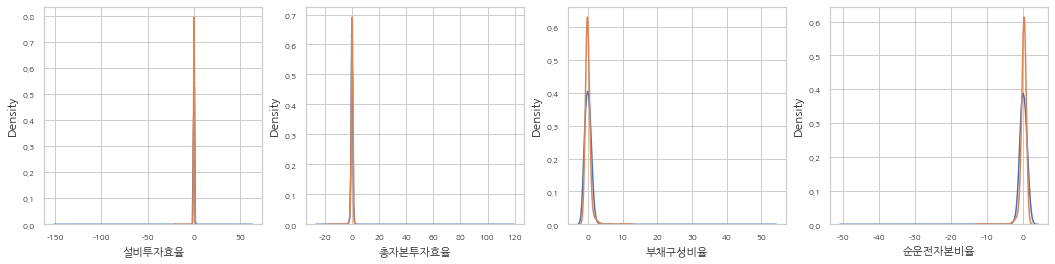

In [381]:
features = t0.columns.values[0:4]
plot_new_feature_distribution(t0, t1, '부도: 0', '부도: 1', features)


<Figure size 432x288 with 0 Axes>

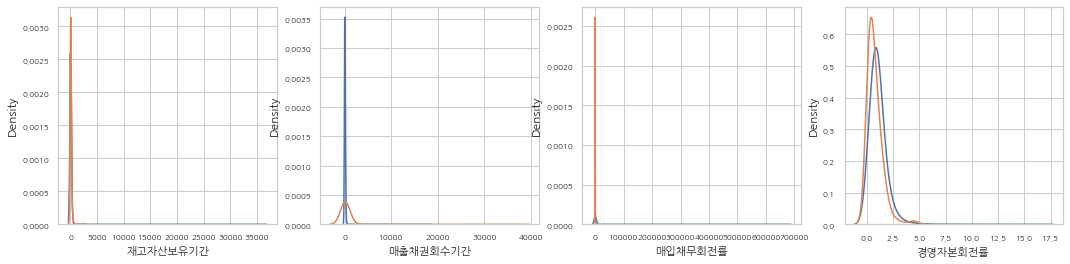

In [333]:
features = dataset.columns.values[7:11]
plot_new_feature_distribution(t0, t1, '부도: 0', '부도: 1', features)

<Figure size 432x288 with 0 Axes>

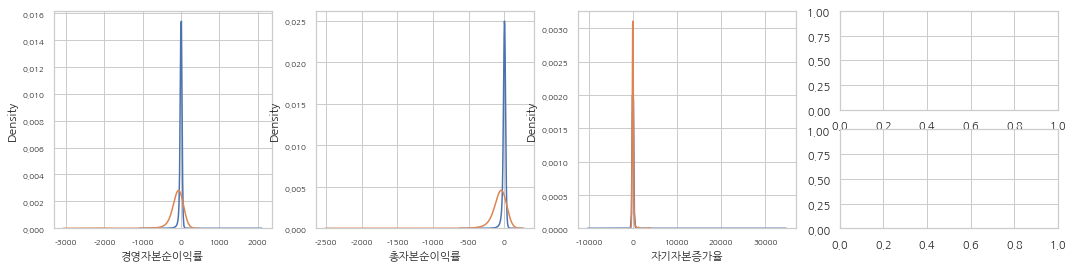

In [334]:
features = dataset.columns.values[11:14]
plot_new_feature_distribution(t0, t1, '부도: 0', '부도: 1', features)

In [353]:
t0.columns

Index(['설비투자효율', '총자본투자효율', '부채구성비율', '순운전자본비율', '재고자산보유기간', '매출채권회수기간',
       '매입채무회전률', '경영자본회전률', '경영자본순이익률', '총자본순이익률', '자기자본증가율'],
      dtype='object')

In [335]:
from sklearn.preprocessing import StandardScaler

In [371]:
t0 = dataset.loc[dataset['부도'] == 0]
t1 = dataset.loc[dataset['부도'] == 1]

t0 = t0.drop(['회사명','거래소코드','회계년도','년','key','부도'], axis=1)
t1 = t1.drop(['회사명','거래소코드','회계년도','년','key','부도'], axis=1)

In [372]:
scaler = StandardScaler()
t0[['설비투자효율', '총자본투자효율', '부채구성비율', '순운전자본비율', '재고자산보유기간', '매출채권회수기간',
       '매입채무회전률', '경영자본회전률', '경영자본순이익률', '총자본순이익률', '자기자본증가율']] = scaler.fit_transform(t0)
t1[['설비투자효율', '총자본투자효율', '부채구성비율', '순운전자본비율', '재고자산보유기간', '매출채권회수기간',
       '매입채무회전률', '경영자본회전률', '경영자본순이익률', '총자본순이익률', '자기자본증가율']] = scaler.fit_transform(t1)

In [391]:
plt.xlim([-2, 2])
sns.kdeplot(t0['설비투자효율'],bw=0.5)
sns.kdeplot(t1['설비투자효율'], bw=0.5)


TypeError: 'list' object is not callable

In [386]:
plt.xlim([-2, 2])
sns.kdeplot(t0['총자본투자효율'],bw=0.5)
sns.kdeplot(t1['총자본투자효율'], bw=0.5)

TypeError: 'list' object is not callable